In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h5_ts_file = h5py.File('elekin_phd_et.hdf5','r')

In [3]:
h5_ts_file.keys()

<KeysViewHDF5 ['cerebellum_ts']>

In [4]:
group = h5_ts_file.get('cerebellum_ts')

In [5]:
[item for item in group]

['_session_id_1_subject_id_C503',
 '_session_id_1_subject_id_T004',
 '_session_id_1_subject_id_C578',
 '_session_id_1_subject_id_T006']

In [17]:
timeseries = []
for item in group:
    #print(item)
    timeseries.append(np.array(group.get(item)))
X_train = np.array(timeseries)
h5_ts_file.close()

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [8]:
Y_train = to_categorical([0,1,0,1])
#test_labels = to_categorical(test_labels)

In [13]:
X_train.shape,Y_train.shape

((4, 158, 28), (4, 2))

In [24]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
#X_test_data_flat = test_data.reshape((test_data.shape[0], -1))
X_train_flat.shape

(4, 4424)

In [25]:
model = Sequential()
model.add(Dense(8, input_shape=(X_train_flat.shape[-1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Train on 3 samples, validate on 1 samples
Epoch 1/5
3/3 [==============================] - 0s 10ms/step - loss: 0.7294 - acc: 0.3333 - val_loss: 0.9052 - val_acc: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 0s 1ms/step - loss: 0.9996 - acc: 0.3333 - val_loss: 0.9836 - val_acc: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 0s 863us/step - loss: 0.5116 - acc: 0.6667 - val_loss: 1.0247 - val_acc: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 0s 859us/step - loss: 0.7304 - acc: 0.3333 - val_loss: 1.0784 - val_acc: 0.0000e+00
Epoch 5/5
3/3 [==============================] - 0s 872us/step - loss: 0.3932 - acc: 0.6667 - val_loss: 1.0993 - val_acc: 0.0000e+00


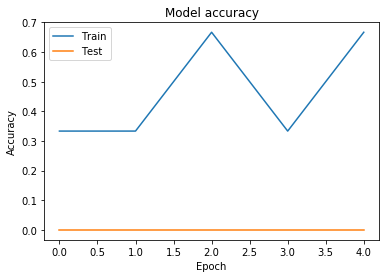

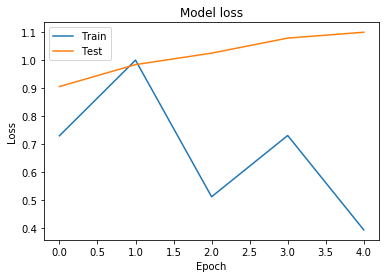

In [26]:
history = model.fit(X_train_flat, Y_train, epochs=5, batch_size=16, validation_split=0.2)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()